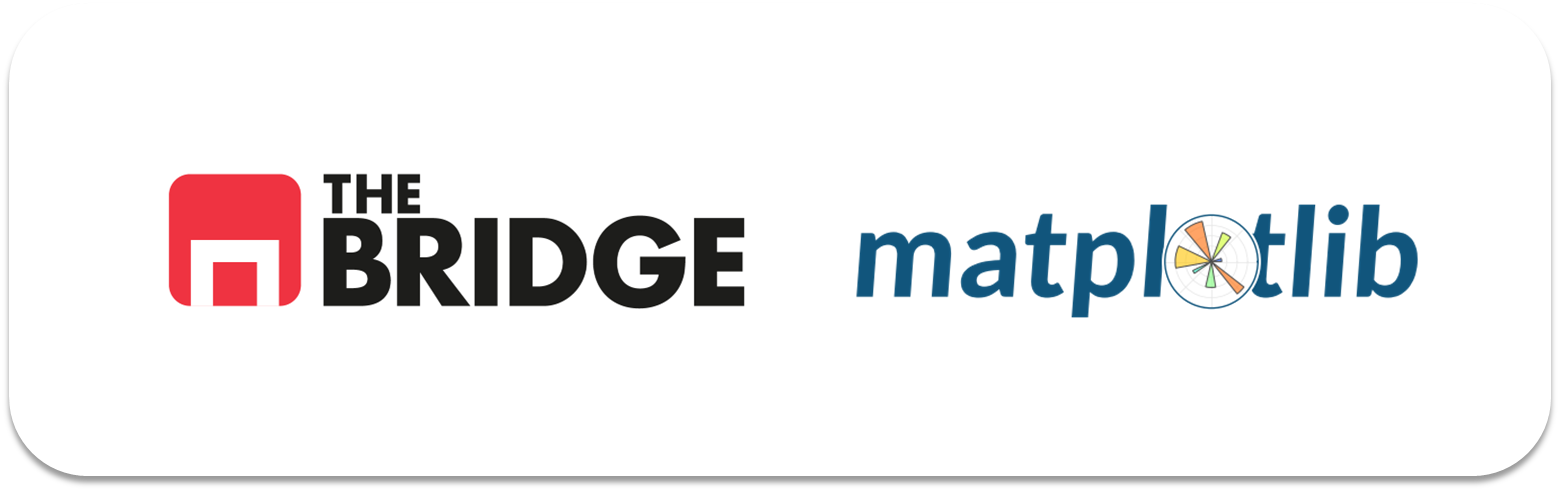

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [16]:
df = pd.read_csv('./data/california_cities.csv')
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
286,286,Norco,33.931111,-117.548611,195.0,640.0,27063,14.278,13.962,0.316,36.980,36.161,0.819,2.22
139,139,Fillmore,34.401389,-118.917778,139.0,456.0,15002,3.365,3.364,0.001,8.715,8.712,0.003,0.03


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

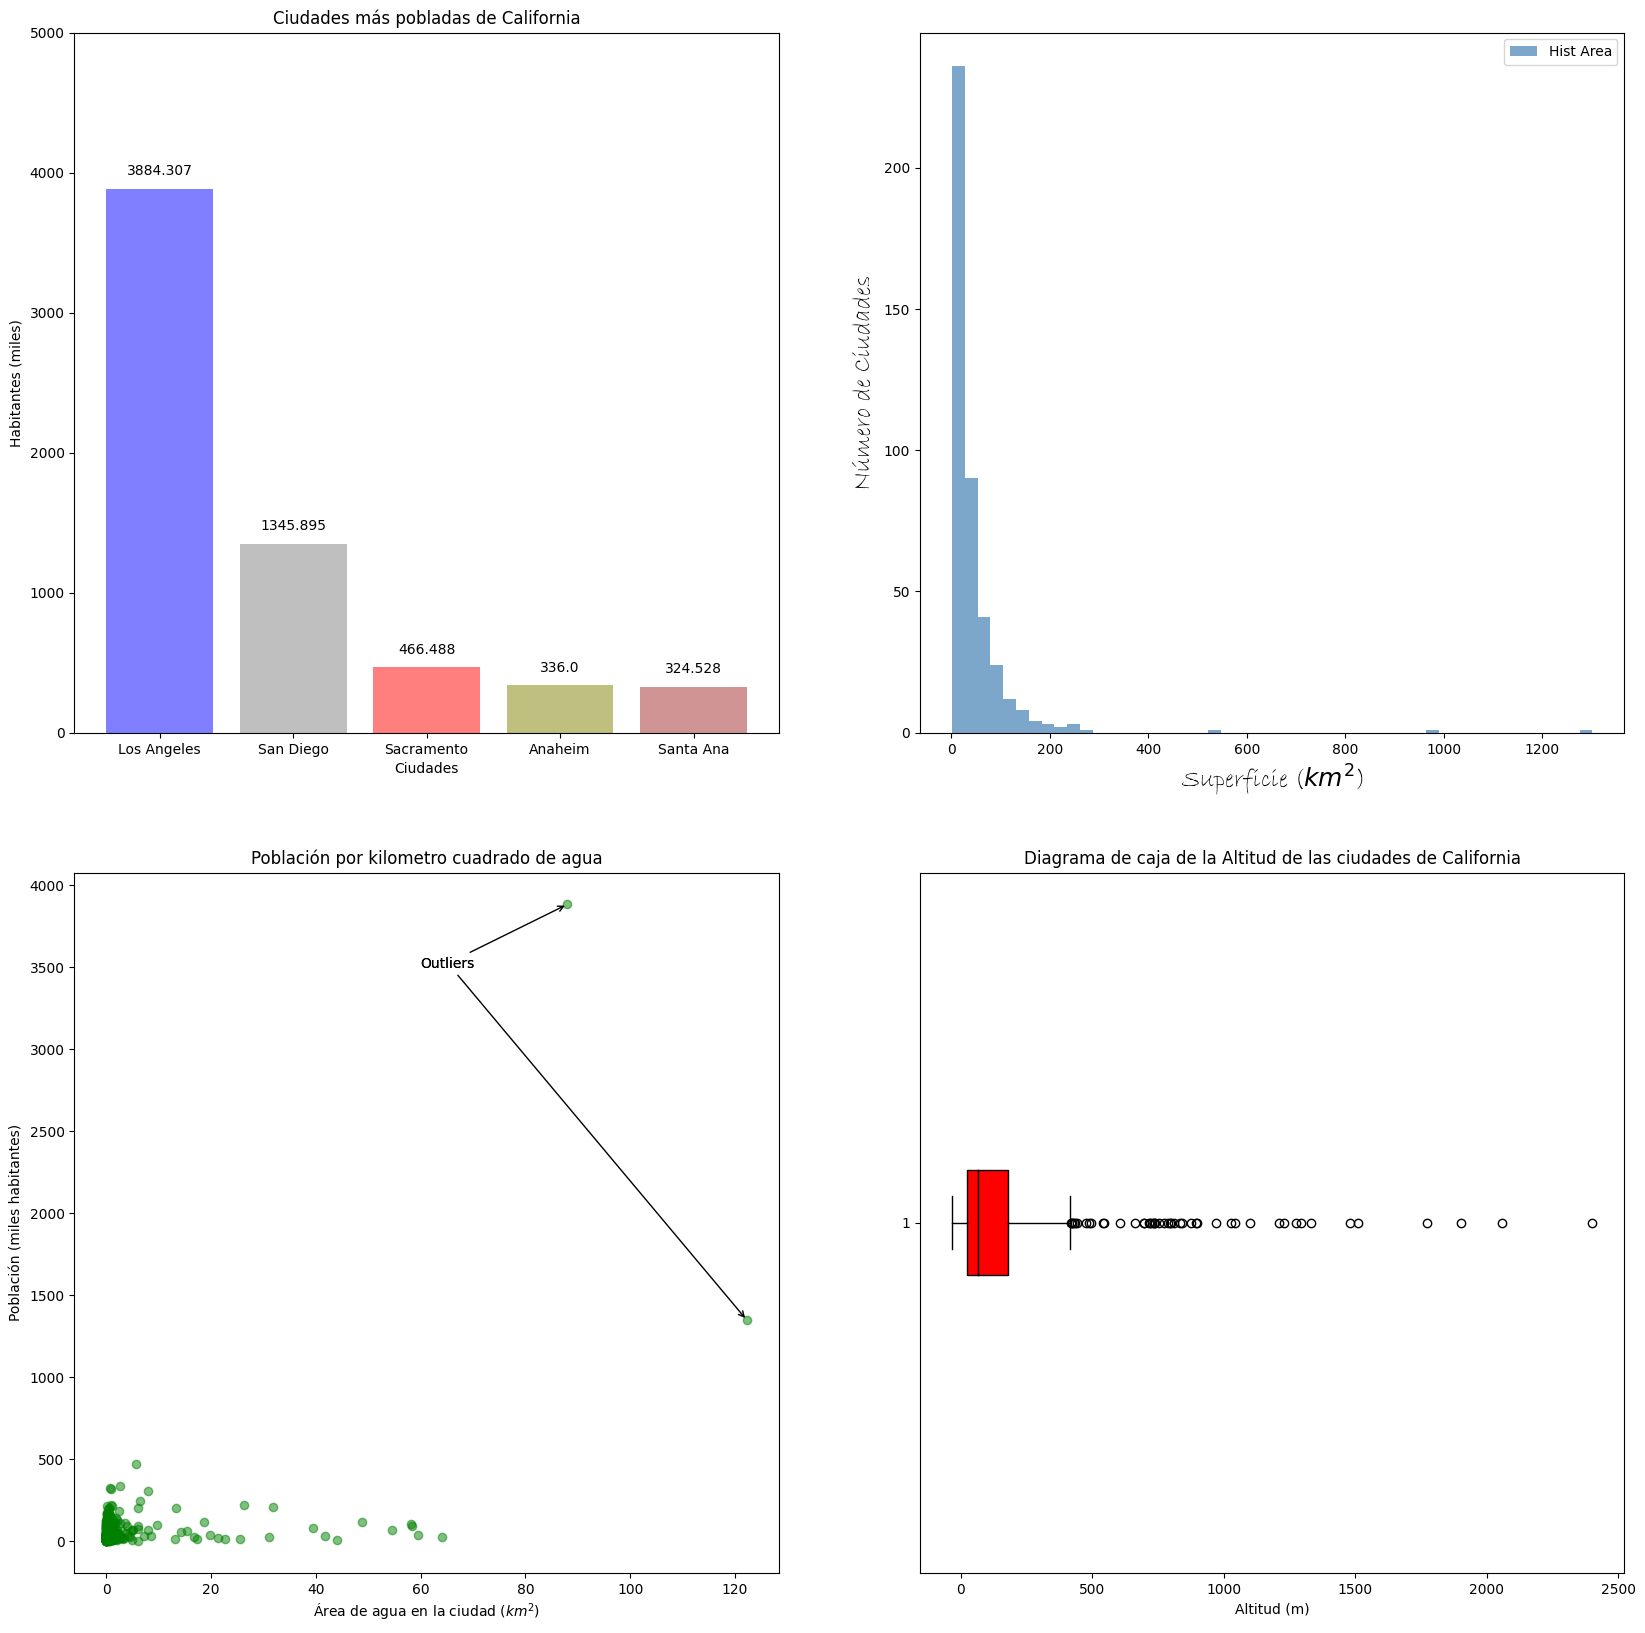

In [17]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
228,228,Livermore,37.681944,-121.768056,NaN,495.0,83547,25.176,25.173,0.003,65.204,65.198,0.007,0.01
229,229,Livingston,37.386944,-120.723611,40.0,131.0,13058,3.715,3.715,0.000,9.622,9.622,0.000,0.00


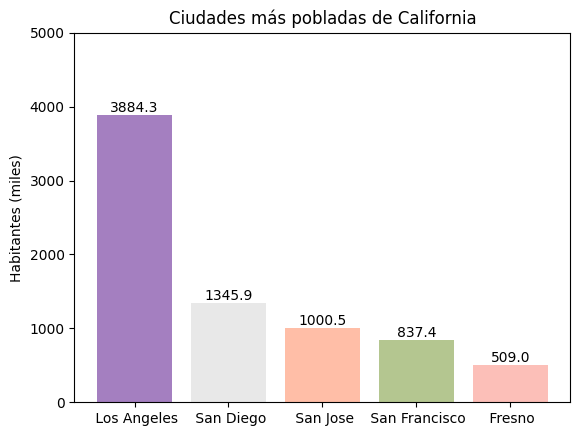

In [ ]:
# SUBPLOT 2.2.1
# 1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos 
# se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)

# identifico las 5 ciudades con mayor población
df_top_populated = df.nlargest(5, 'population_total')
df_top_populated

# genero código de colores
colores = ["indigo","lightgray","coral","olivedrab","salmon"]

# nueva columna con los nombres de las ciudades corregidas
df_top_populated["city_2"] = df_top_populated["city"].str.replace(r'(?<!\s)([A-Z])', r' \1', regex=True)

# gráfico
plt.bar(df_top_populated["city_2"], height = df_top_populated["population_total"]/1000, color = colores, alpha = 0.5)
plt.ylabel("Habitantes (miles)")
plt.ylim(0,5000)
plt.title("Ciudades más pobladas de California")

# # Agregar etiquetas encima de cada barra
for i, value in enumerate(df_top_populated["population_total"]/1000):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=10)


In [41]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,city_2
84,84,Colma,37.678889,-122.455556,37.0,121.0,1792,1.909,1.909,0.0,4.945,4.945,0.0,0.0,NaN
330,330,Portola,39.810278,-120.469722,1480.0,4856.0,2104,5.407,5.407,0.0,14.003,14.003,0.0,0.0,NaN


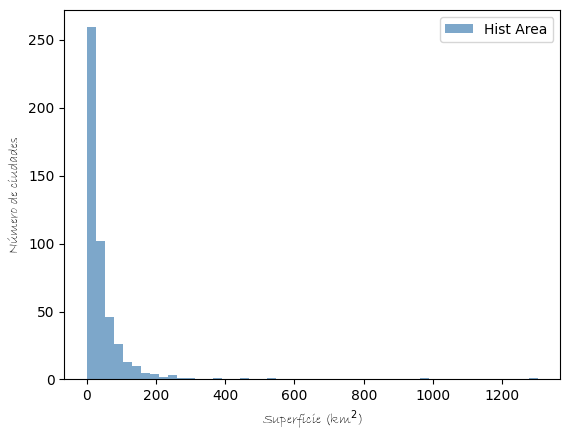

In [69]:
# SUBPLOT 2.2.2
# 2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

plt.hist(df["area_total_km2"],bins=50,color="steelblue",alpha=0.7,label="Hist Area")
plt.xlabel("Superficie (km$^2$)",font = "Bradley Hand itc")
plt.ylabel("Número de ciudades",font = "Bradley Hand itc");
plt.legend()



In [56]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,city_2
346,346,Ridgecrest,35.622500,-117.670833,698.0,2290.0,27616,21.417,20.766,0.651,55.469,53.783,1.685,3.04,NaN
240,240,LosBanos,37.058333,-120.850000,36.0,118.0,35972,10.117,9.993,0.124,26.203,25.882,0.321,1.22,NaN


Text(75, 3460, '')

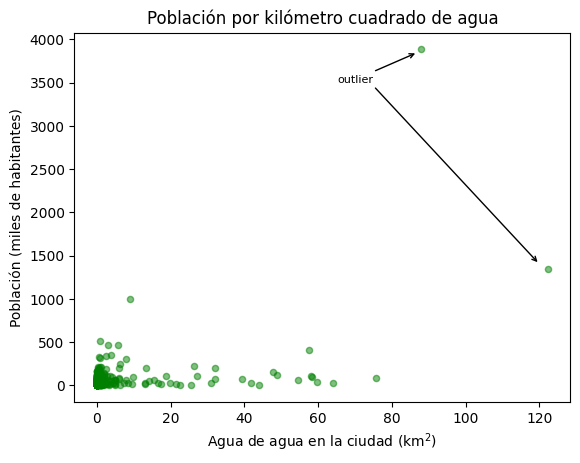

In [101]:
# SUBPLOT 2.2.3
# 3. El scatter de área de agua de un ciudad con su poblacion.

plt.scatter(df["area_water_km2"],df["population_total"]/1000,color="green",s=20, alpha=0.5)
plt.xlabel("Agua de agua en la ciudad (km$^2$)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Población por kilómetro cuadrado de agua");



# Agregar anotaciones para los outliers
plt.annotate(
    "outlier",  # Etiqueta
    xy=(87,3850),  # Coordenadas del punto
    xytext=(70,3500),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

# Agregar anotaciones para los outliers
plt.annotate(
    "",  # Etiqueta
    xy=(120,1400),  # Coordenadas del punto
    xytext=(75,3460),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)


In [102]:
df.sample(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,city_2
298,298,Orland,39.747500,-122.196389,79.0,259.0,7291,2.971,2.971,0.000,7.696,7.696,0.000,0.00,NaN
432,432,Tiburon,37.873611,-122.456667,4.0,13.0,8962,13.182,4.446,8.736,34.140,11.515,22.625,66.27,NaN


In [107]:
print(df["elevation_m"].describe())  # Resumen estadístico de la columna
print(df["elevation_m"].isnull().sum())  # Ver cuántos valores NaN hay

df_cleaned = df.dropna(subset=["elevation_m"])  # Eliminar filas con NaN en elevation_m

count     434.000000
mean      180.416705
std       309.531825
min       -34.000000
25%        22.000000
50%        67.000000
75%       173.500000
max      2402.000000
Name: elevation_m, dtype: float64
48


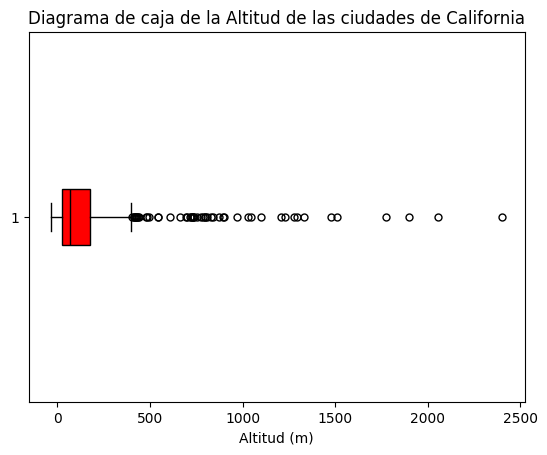

In [116]:
# SUBPLOT 2.2.4
# 4. El boxplot de la altura de las ciudades.

plt.boxplot(df_cleaned["elevation_m"],
            patch_artist=True, 
            boxprops=dict(facecolor='red',edgecolor='black'), 
            medianprops = dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert = False)

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California");

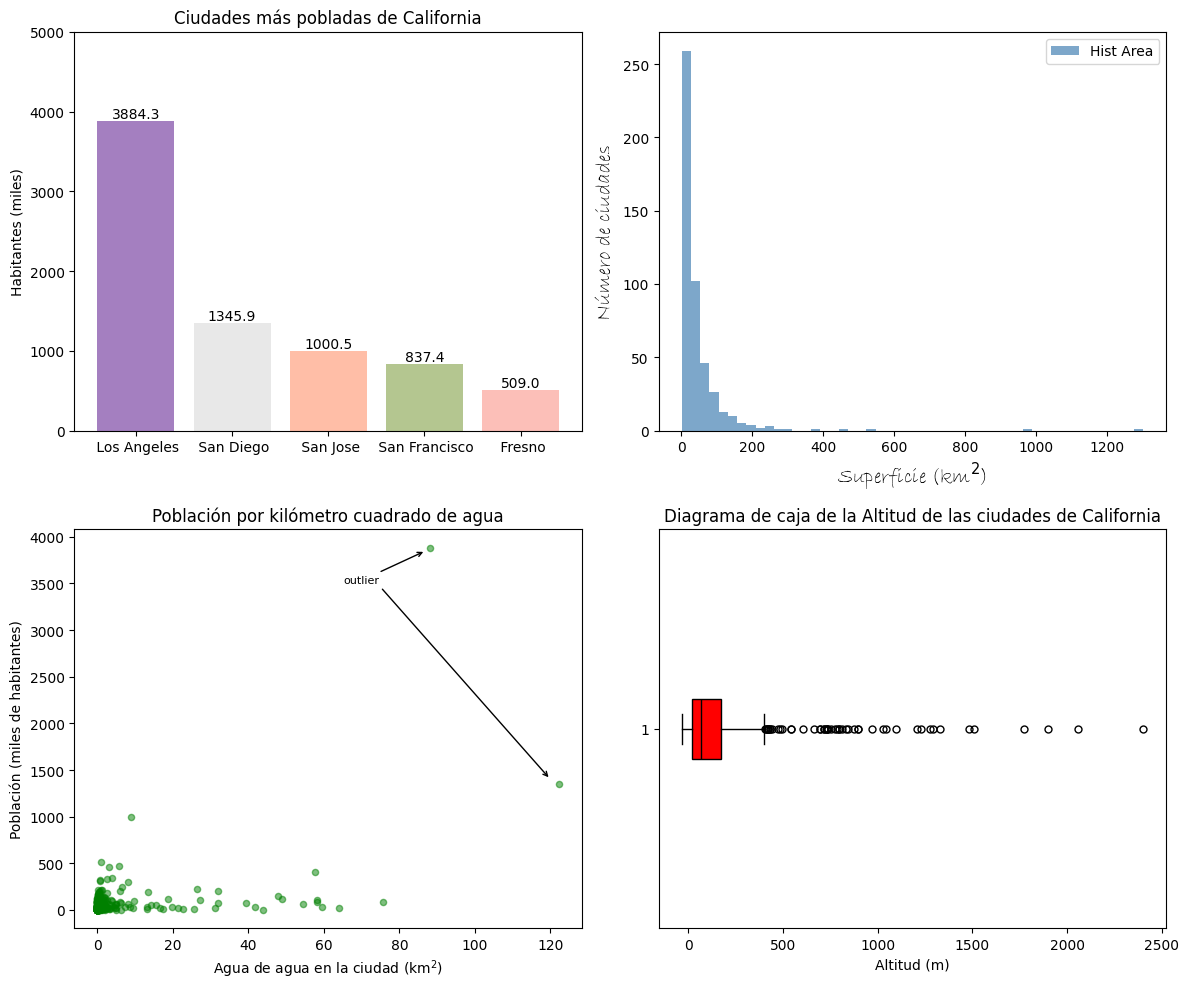

In [127]:
# Definir el tamaño de la figura
plt.figure(figsize=(12, 10))  # Ancho y alto de la figura en pulgadas

# subplot 2.2.1
plt.subplot(2,2,1)
# identifico las 5 ciudades con mayor población
df_top_populated = df.nlargest(5, 'population_total')
colores = ["indigo","lightgray","coral","olivedrab","salmon"]
df_top_populated["city_2"] = df_top_populated["city"].str.replace(r'(?<!\s)([A-Z])', r' \1', regex=True)

# gráfico
plt.bar(df_top_populated["city_2"], height = df_top_populated["population_total"]/1000, color = colores, alpha = 0.5)
plt.ylabel("Habitantes (miles)")
plt.ylim(0,5000)
plt.title("Ciudades más pobladas de California")
# # Agregar etiquetas encima de cada barra
for i, value in enumerate(df_top_populated["population_total"]/1000):
    plt.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

# subplot 2.2.2
plt.subplot(2,2,2)
plt.hist(df["area_total_km2"],bins=50,color="steelblue",alpha=0.7,label="Hist Area")
plt.xlabel("Superficie (km$^2$)",font = "Bradley Hand itc",fontsize = 15)
plt.ylabel("Número de ciudades",font = "Bradley Hand itc", fontsize = 15);
plt.legend()

# subplot 2.2.3
plt.subplot(2,2,3)
plt.scatter(df["area_water_km2"],df["population_total"]/1000,color="green",s=20, alpha=0.5)
plt.xlabel("Agua de agua en la ciudad (km$^2$)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Población por kilómetro cuadrado de agua");

# Agregar anotaciones para los outliers
plt.annotate(
    "outlier",  # Etiqueta
    xy=(87,3850),  # Coordenadas del punto
    xytext=(70,3500),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

# Agregar anotaciones para los outliers
plt.annotate(
    "",  # Etiqueta
    xy=(120,1400),  # Coordenadas del punto
    xytext=(75,3460),  # Coordenadas del texto
    textcoords="data",
    arrowprops=dict(arrowstyle="->", color="black", lw=1),  # Flecha
    fontsize=8,
    ha="center"
)

# subplot 2.2.4
plt.subplot(2,2,4)
plt.boxplot(df_cleaned["elevation_m"],
            patch_artist=True, 
            boxprops=dict(facecolor='red',edgecolor='black'), 
            medianprops = dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert = False)

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California");

# Ajustar la separación entre subplots
plt.tight_layout()  # Ajuste automático
# O manualmente con plt.subplots_adjust(hspace=0.5, wspace=0.3)

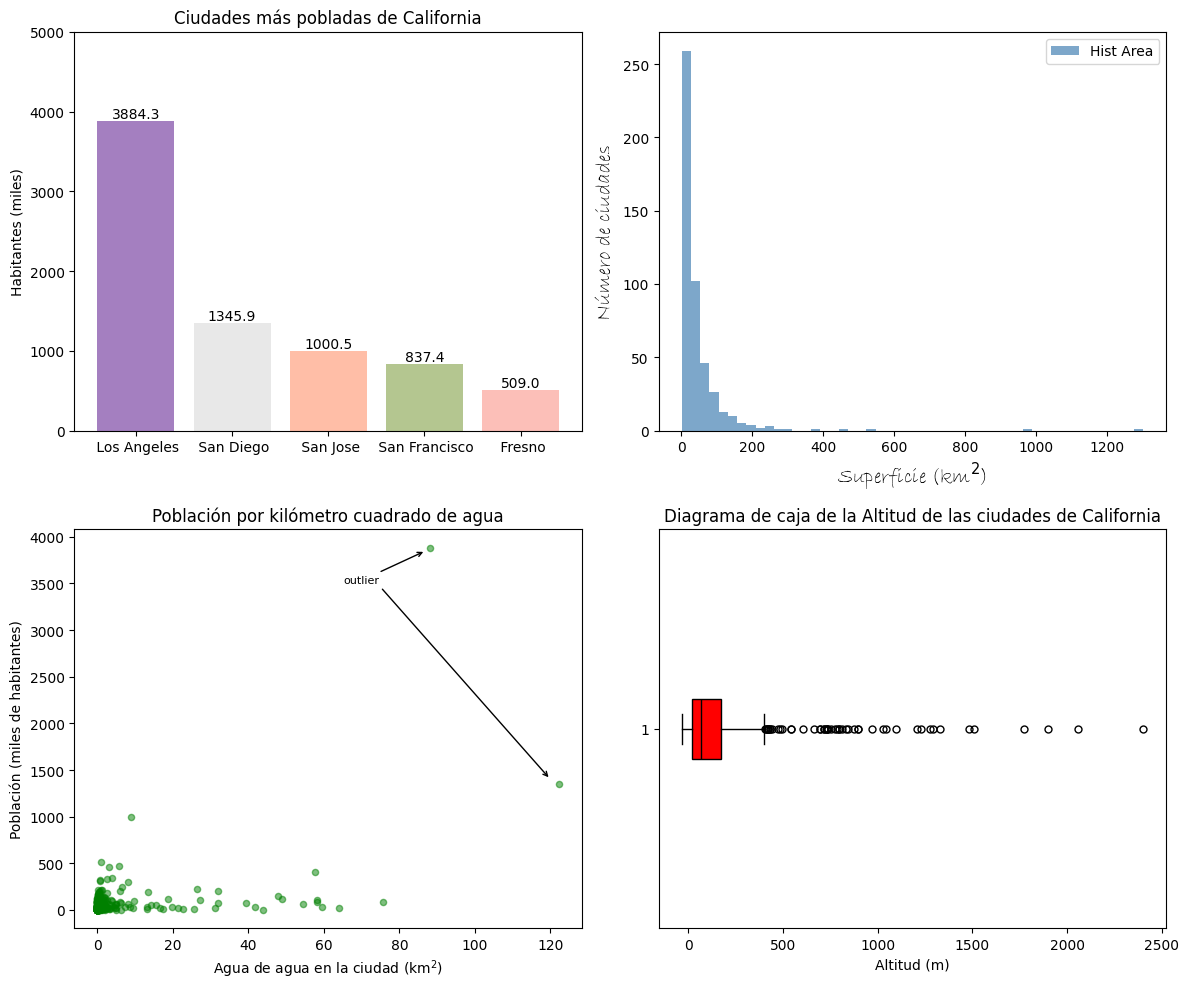

In [133]:
# Crear la figura y guardar como variable
fig = plt.figure(figsize=(12, 10))  # Tamaño de la figura

# Subplot 1
ax1 = fig.add_subplot(2, 2, 1)
df_top_populated = df.nlargest(5, 'population_total')
colores = ["indigo", "lightgray", "coral", "olivedrab", "salmon"]
df_top_populated["city_2"] = df_top_populated["city"].str.replace(r'(?<!\s)([A-Z])', r' \1', regex=True)
ax1.bar(df_top_populated["city_2"], height=df_top_populated["population_total"] / 1000, color=colores, alpha=0.5)
ax1.set_ylabel("Habitantes (miles)")
ax1.set_ylim(0, 5000)
ax1.set_title("Ciudades más pobladas de California")
for i, value in enumerate(df_top_populated["population_total"] / 1000):
    ax1.text(i, value + 0.5, f"{value:.1f}", ha='center', va='bottom', fontsize=10)

# Subplot 2
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(df["area_total_km2"], bins=50, color="steelblue", alpha=0.7, label="Hist Area")
ax2.set_xlabel("Superficie (km$^2$)", font="Bradley Hand itc",fontsize = 15)
ax2.set_ylabel("Número de ciudades", font="Bradley Hand itc", fontsize = 15)
ax2.legend()

# Subplot 3
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(df["area_water_km2"], df["population_total"] / 1000, color="green", s=20, alpha=0.5)
ax3.set_xlabel("Agua de agua en la ciudad (km$^2$)")
ax3.set_ylabel("Población (miles de habitantes)")
ax3.set_title("Población por kilómetro cuadrado de agua")
ax3.annotate(
    "outlier", xy=(87, 3850), xytext=(70, 3500),
    textcoords="data", arrowprops=dict(arrowstyle="->", color="black", lw=1),
    fontsize=8, ha="center"
)
ax3.annotate(
    "", xy=(120, 1400), xytext=(75, 3460),
    textcoords="data", arrowprops=dict(arrowstyle="->", color="black", lw=1),
    fontsize=8, ha="center"
)

# Subplot 4
ax4 = fig.add_subplot(2, 2, 4)
ax4.boxplot(df_cleaned["elevation_m"],
            patch_artist=True,
            boxprops=dict(facecolor='red', edgecolor='black'),
            medianprops=dict(color='black'),
            flierprops=dict(marker="o", color="black", markersize=5),
            vert=False)
ax4.set_xlabel("Altitud (m)")
ax4.set_title("Diagrama de caja de la Altitud de las ciudades de California")

# Ajustar la separación entre subplots
fig.tight_layout()

# Guardar la figura en un archivo
fig.savefig("ciudades_california.png", dpi=300, bbox_inches="tight")

# Mostrar la figura
plt.show()


### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [134]:
# Guardar la figura en un archivo
fig.savefig("stats_california_cities.png", dpi=300, bbox_inches="tight")  # DPI ajusta la resolución